## Title: 'BellaBeat: How Can a Wellness Technology Company Play It Smart?’
## Author: "Rohini Kaithia"
## Date: "5/10/2021"

Introduction:
About the company:

Bellabeat, founded in 2013 is a high-tech company that manufactures health-focused smart products. Urška Sršen and Sando Mur founded Bellabeat. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits.

This Bellabeat case study will follow the steps of the data analysis process: 
* Ask 
* Prepare
* Process
* Analyze 
* Share
* Act

Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. I need to analyze smart device data to gain insight into how consumers are using their smart devices. 

Products: 
* Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products. 
* Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress. 
* Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness. 
* Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.

**PHASE1: ASK**

**Identify the business task**:
Identify patterns in the fitness data of customers and provide high level recommendations to the company to target their marketing efforts.

**Consider Key stakeholders**:
The main stakeholders here are Urška Sršen, Sando Mur and the rest of the Bellabeat marketing analytics team.

**The business task**:
Bellabeat's business task is to analyze smart device fitness data to unlock new growth opportunities and to gain insight into how customers are using their smart devices, which helps the marketing strategy of the company. For analysis, we examine:

* What are some trends in smart device usage? 
* How could these trends apply to Bellabeat customers? 
* How could these trends help influence Bellabeat marketing strategy?

**PHASE2: PREPARE**

**DATASET:**

FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set contains personal fitness tracker from 30 fitbit users. 30 eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore user's habits.
The data was stored in the archive (.zip format file) and after unpacking it in .xls, I noticed that it is organized in long and wide format, both.

**PHASE 3: PROCESS**

Need to transform the data so that I can work with it effectively. For that I followed the following steps:
* Unzipped the downloaded files in respective folders.
* I opened all the files and found out few files were not opening (cause they were having a large amount of data and excel didn’t allow it). (Data can be opened using another tool, BigQuery or R)
* Checked the correctness of data format. Sorted and filtered data to find any errors inside.
* Cleaned the duplicates. 
* Transferred all data in R.

**PHASE 4: ANALYZE**

*Key Tasks:*

* Perform calculations
* Identify trends and relationships

Lets load the required libraries. 

In [1]:
library(tidyverse)
library(dplyr)
library(skimr)
library(lubridate)
library(ggplot2)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# Importing datasets

daily_activity <- read.csv("../input/fitbit-dailyactivity/dailyActivity_merged.csv")
daily_calories <- read.csv("../input/fitbit-dailycalories/dailyCalories_merged.csv")
daily_intensities <- read.csv("../input/fitbit-dailyintensities/dailyIntensities_merged.csv")
daily_steps <- read.csv("../input/fitbit-dailysteps/dailySteps_merged.csv")
hourly_calories <- read.csv("../input/fitbit-hourlycalories/hourlyCalories_merged.csv")
hourly_intensities <- read.csv("../input/fitbit-hourlyintensities/hourlyIntensities_merged.csv")
sleep_day <- read.csv("../input/sleepday/sleepDay_merged.csv")
weight_log <- read.csv("../input/fitbit-weightloginfo/weightLogInfo_merged.csv")


*Lets check if our data is loaded correctly.* 

In [3]:
head(daily_activity,4)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745


In [4]:
head(daily_calories,4)

,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745


In [5]:
head(daily_intensities,4)

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
2,1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
3,1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
4,1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14


In [6]:
head(daily_steps,4)

,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762


In [7]:
head(hourly_calories,4)

,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47


In [8]:
head(hourly_intensities,4)

,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000


In [9]:
head(sleep_day,4)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367


In [10]:
head(weight_log,4)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12


*Checking missing values in each data frame using is.na() function.*

In [11]:
sum(is.na(daily_activity))
sum(is.na(daily_calories))
sum(is.na(daily_intensities))
sum(is.na(daily_steps))
sum(is.na(hourly_calories))
sum(is.na(hourly_intensities))
sum(is.na(sleep_day))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [12]:
#Total number of observations in each data frame.

nrow(daily_activity)
nrow(daily_calories)
nrow(daily_intensities)
nrow(daily_steps)
nrow(hourly_calories)
nrow(hourly_intensities)
nrow(sleep_day)

[1] 940

[1] 940

[1] 940

[1] 940

[1] 22099

[1] 22099

[1] 413

In [13]:
#Unique participants in each data frame using ID

n_distinct(daily_activity$Id)
n_distinct(daily_calories$Id)
n_distinct(daily_intensities$Id)
n_distinct(daily_steps$Id)
n_distinct(sleep_day$Id)
n_distinct(weight_log$Id)

[1] 33

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

Following information is extracted from above data:

We have 33 unique participants in daily_activity, daily_calories, daily_intensities, and daily_steps data frame. 
Sleep_day data frame has 24 unique participants and weight_log has 8, which is not enough for the analysis. 


In [14]:
#Checking the class of dataframe

class(daily_activity$ActivityDate)
class(daily_calories$ActivityDay)
class(daily_intensities$ActivityDay)
class(daily_steps$ActivityDay)
class(sleep_day$SleepDay)


[1] "character"

[1] "character"

[1] "character"

[1] "character"

[1] "character"

class() function reveals that date formats in the respective dataframe are in character form, which can be tallied from head() function too. Let’s change them. 

In [15]:
#daily_activity
daily_activity$ActivityDate <- as.Date(daily_activity$ActivityDate, 
                         format= "%m/%d/%y")

#calories
daily_calories$ActivityDay <- as.POSIXct(daily_calories$ActivityDay,
                                  format= "%m/%d/%Y")
#sleep
sleep_day$SleepDay <- as.Date(sleep_day$SleepDay,
                            format= "%m/ %d/ %y")

head(daily_activity,4)
head(daily_calories,4)
head(sleep_day,4)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2020-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2020-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2020-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2020-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745


,Id,ActivityDay,Calories
,<dbl>,<dttm>,<int>
1,1503960366,2016-04-12,1985
2,1503960366,2016-04-13,1797
3,1503960366,2016-04-14,1776
4,1503960366,2016-04-15,1745


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<date>,<int>,<int>,<int>
1,1503960366,2020-04-12,1,327,346
2,1503960366,2020-04-13,2,384,407
3,1503960366,2020-04-15,1,412,442
4,1503960366,2020-04-16,2,340,367


In [16]:
#dropping missing values or 'NULL' values
drop_na(sleep_day)


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<date>,<int>,<int>,<int>
1503960366,2020-04-12,1,327,346
1503960366,2020-04-13,2,384,407
1503960366,2020-04-15,1,412,442
1503960366,2020-04-16,2,340,367
1503960366,2020-04-17,1,700,712
1503960366,2020-04-19,1,304,320
1503960366,2020-04-20,1,360,377
1503960366,2020-04-21,1,325,364
1503960366,2020-04-23,1,361,384


In [17]:
skim_without_charts(sleep_day)
skim_without_charts(daily_activity)


── Data Summary ────────────────────────
                           Values   
Name                       sleep_day
Number of rows             413      
Number of columns          5        
_______________________             
Column type frequency:              
  Date                     1        
  numeric                  4        
________________________            
Group variables            None     

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 SleepDay              0             1 2020-04-12 2020-05-12 2020-04-27
  n_unique
1       31

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate          mean      sd         p0
1 Id                         0             1 5000979403.   2.06e+9 1503960366
2 TotalSleepRecords          0             1          1.12 3.46e-1          1
3 TotalMinutesAsleep   

***Now let’s check some data stats from the dataset***

In [18]:
#daily_activity

daily_activity %>%
select(TotalSteps, TotalDistance, SedentaryMinutes) %>%
summary()
head(daily_activity, n=10)

   TotalSteps    TotalDistance    SedentaryMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8  
 Median : 7406   Median : 5.245   Median :1057.5  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5  
 Max.   :36019   Max.   :28.030   Max.   :1440.0  

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2020-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2020-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2020-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2020-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2020-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2020-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
7,1503960366,2020-04-18,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
8,1503960366,2020-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
9,1503960366,2020-04-20,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


**Analysis:**
* Average steps/ day: 7638
* Average distance travelled/ day: 5.490 km
* Average Sedentary Minutes/ day: 991.2 mins ~ 16.52 hrs

* Maximum steps/ day: 36019
* Maximum distance travelled/ day: 28.030 km
* Maximum Sedentary Minutes/ day: 1440 mins ~ 24 hrs

2011 study found that healthy adults should take 10,000 steps/day, i.e. is a reasonable target for healthy adults. Unfortunately tracking data shows that people are doing it less than the recommended target by doctor. 
Sedentary time is 16.52 hrs, which is also very unhealthy for a human body and can lead to health issues in the long term.


In [19]:
#number of minutes in each category
daily_activity %>%
select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
summary()

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

**Analysis:** 
Average very active minutes per day is 21.16 mins. Whereas WHO recommends adults 18+ should do at least 75–150 minutes of vigorous-intensity activities/workout throughout the week.


In [20]:
#sleep data
sleep_day %>%  
select(TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed) %>%
summary()


 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

**Analysis:**
Average sleep time is 419.5 mins ~ 6.99 which is equal to doctor's recommendation (i.e. 7 hrs) and total time in bed is 458.6 mins ~ 7.64 hr. 
Maximum sleep time is 796 min ~13.26 hr which is very unhealthy and maximum time in bed is 961 mins 16.01 hr. 
Difference between maximum time in bed and maximum sleep time is 2.75 hr. This raises a question WHY? Do the participants suffer from insomnia or do they read in bed, surf the internet or watch netflix? 

Let's deep dive more and make a plot.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



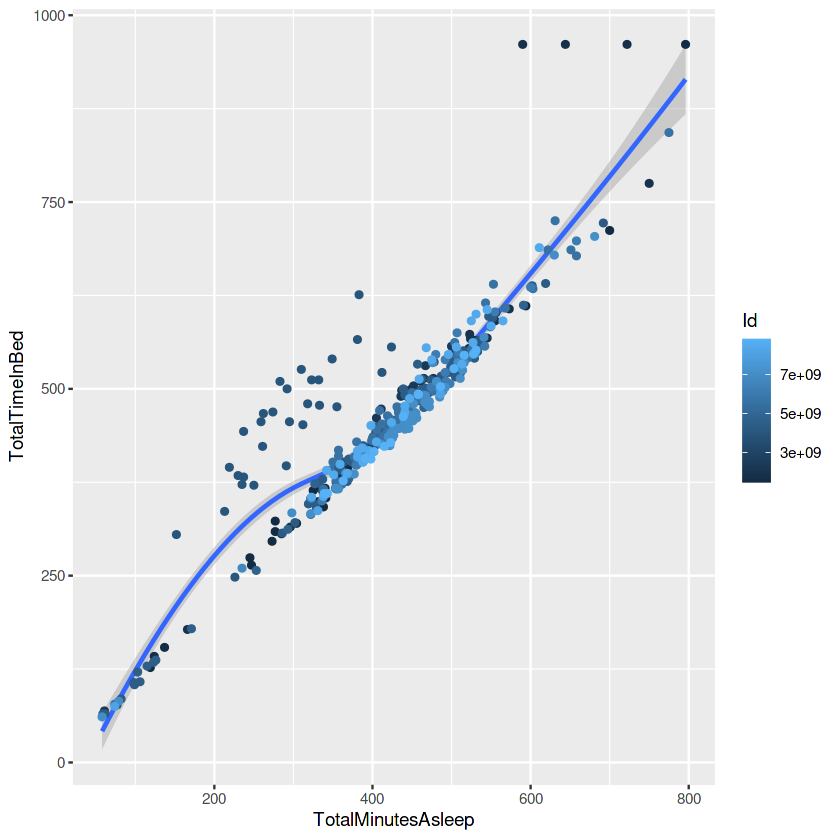

In [21]:
#PLOT1: "Total minutes asleep v/s Time in bed"

ggplot(data=sleep_day) +
geom_smooth(mapping=aes(x=TotalMinutesAsleep, y=TotalTimeInBed, color=Id))+
geom_point(mapping=aes(x=TotalMinutesAsleep, y=TotalTimeInBed, color=Id))

**Plot confirms that the line is not straight hence, there is a difference between sleep time and time in bed which needs to be addressed and removed. So if the Bellabeat users want to improve their sleep, they should consider using notifications to go to sleep early.**

Let's merge data for some more analysis. 

In [22]:
# activity
daily_activity$ActivityDate=as.POSIXct(daily_activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
daily_activity$date <- format(daily_activity$ActivityDate, format = "%m/%d/%Y")
# sleep
sleep_day$SleepDay=as.POSIXct(sleep_day$SleepDay, format= "%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep_day$date <- format(sleep_day$SleepDay, format = "%m/%d/%Y")

head(daily_activity,2)
head(sleep_day,2)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,2020-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/2020
2,1503960366,2020-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/2020


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date
,<dbl>,<dttm>,<int>,<int>,<int>,<chr>
1,1503960366,2020-04-12,1,327,346,04/12/2020
2,1503960366,2020-04-13,2,384,407,04/13/2020


In [23]:
merged_data <- merge(sleep_day, daily_activity, by=c('Id', 'date'))
head(merged_data)


,Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<dttm>,<int>,<int>,<int>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/2020,2020-04-12,1,327,346,2020-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,04/13/2020,2020-04-13,2,384,407,2020-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,04/15/2020,2020-04-15,1,412,442,2020-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,04/16/2020,2020-04-16,2,340,367,2020-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,04/17/2020,2020-04-17,1,700,712,2020-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,04/19/2020,2020-04-19,1,304,320,2020-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



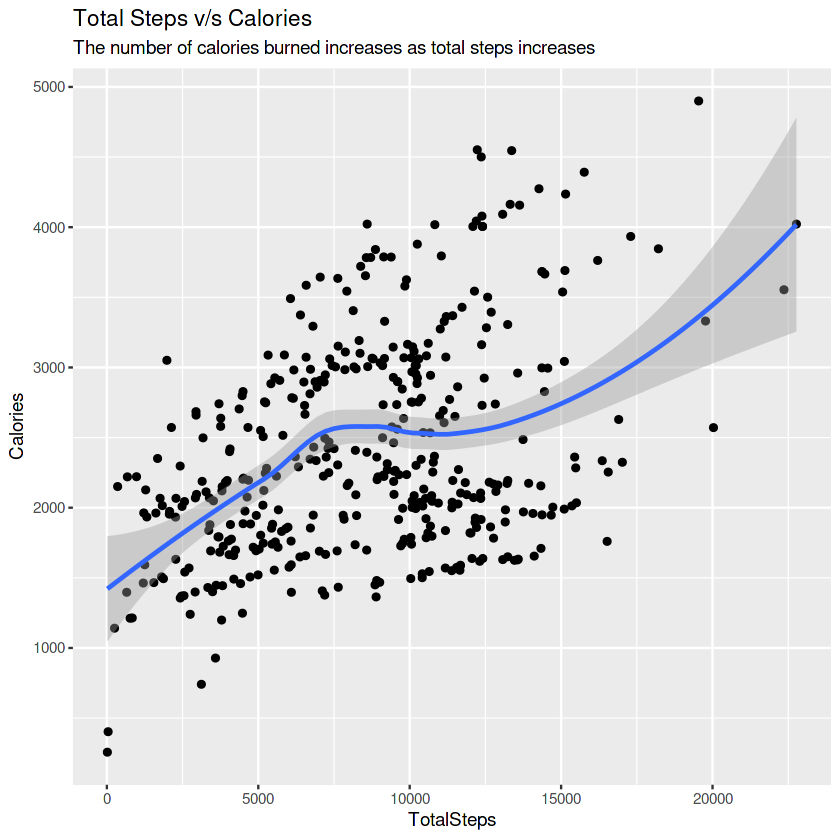

In [24]:
#PLOT2: "Total Steps v/s Calories"

ggplot(data = merged_data)+
geom_point(mapping = aes(x = TotalSteps, y = Calories)) + 
geom_smooth(mapping = aes(x = TotalSteps, y = Calories)) +
labs(title= "Total Steps v/s Calories", subtitle="The number of calories burned increases as total steps increases") 


**Analysis:**
A positive correlation between Total Steps and Calories is observed, which shows that, more active the people are, more calories are burned.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



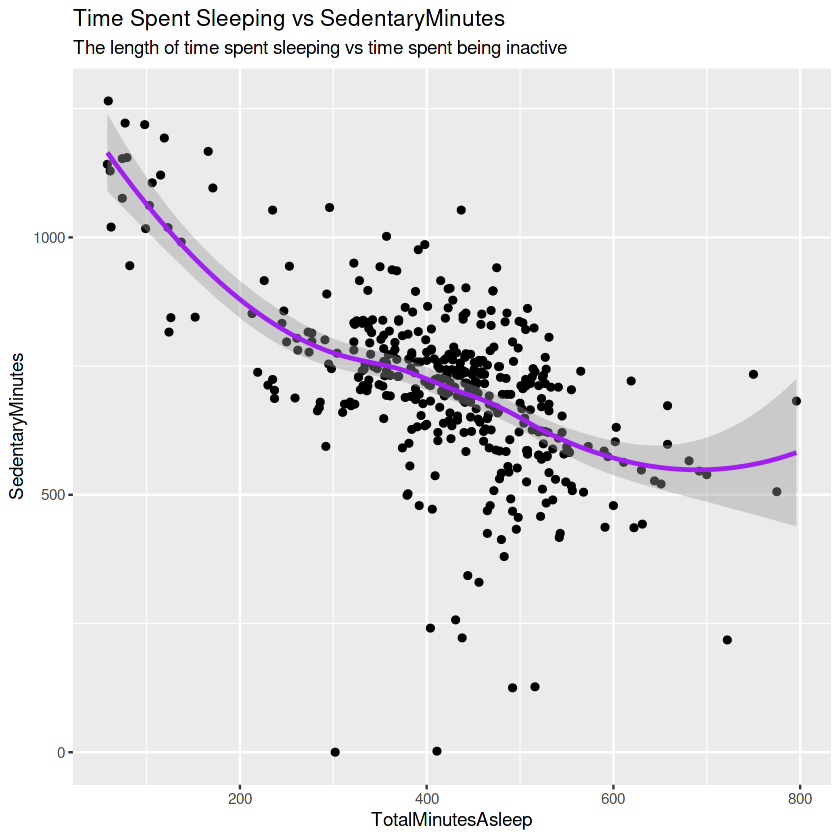

In [25]:
#PLOT3: "Sleeping v/s Sedentary Minutes"

ggplot(data=merged_data)+
geom_point(mapping=aes(x=TotalMinutesAsleep, y = SedentaryMinutes))+
geom_smooth(mapping=aes(x=TotalMinutesAsleep, y = SedentaryMinutes), color='purple')+
labs(title= "Time Spent Sleeping vs SedentaryMinutes", subtitle="The length of time spent sleeping vs time spent being inactive")


**Analysis:**
We can observe in the plot that if time spent in sleeping is increasing then sedentary time is also reducing. If participants wants to actively reduce their sedentary time then Bellabeat could include a feature in their app, notifying people about their basic day to day activities example, when to sleep, when to wake up, & when to do physical exercise.  

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,TotalActiveMinutes,TotalActiveDistance
,<dbl>,<date>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1503960366,2016-04-12,728,328,13,25,0,6.06,0.55,1.88,1094,8.49
2,1503960366,2016-04-13,776,217,19,21,0,4.71,0.69,1.57,1033,6.97
3,1503960366,2016-04-14,1218,181,11,30,0,3.91,0.40,2.44,1440,6.75
4,1503960366,2016-04-15,726,209,34,29,0,2.83,1.26,2.14,998,6.23


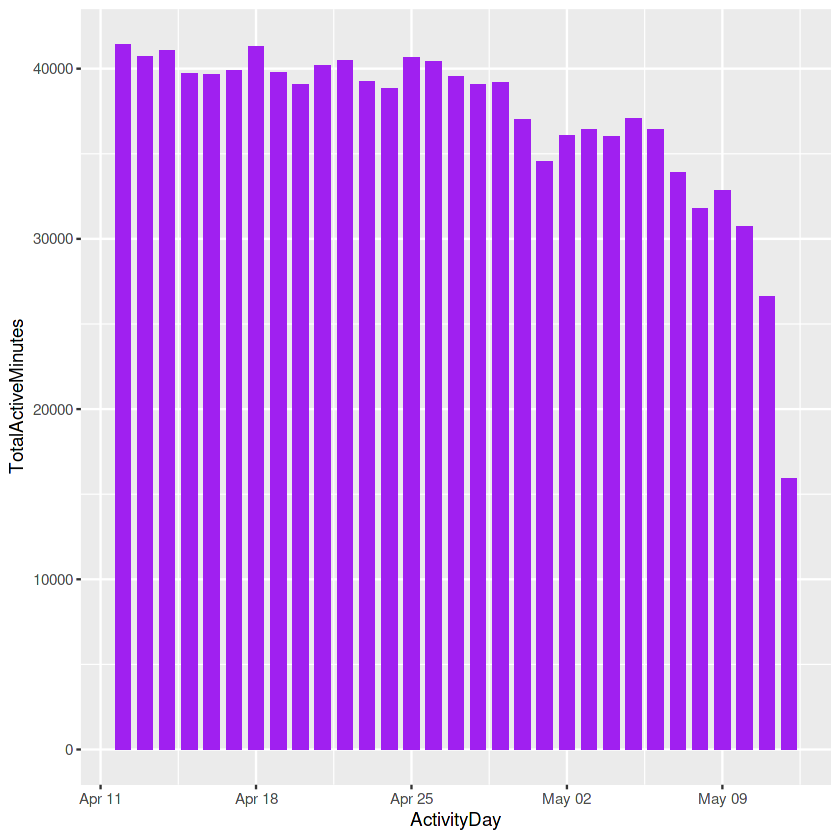

In [26]:
#PLOT4: "Total active minutes v/s Activity Day"

daily_intensities$ActivityDay <- mdy(daily_intensities$ActivityDay)  
daily_intensities <- mutate(daily_intensities,TotalActiveMinutes = SedentaryMinutes + LightlyActiveMinutes + FairlyActiveMinutes + VeryActiveMinutes)
daily_intensities <- mutate(daily_intensities,TotalActiveDistance = SedentaryActiveDistance + LightActiveDistance + ModeratelyActiveDistance + VeryActiveDistance)

head(daily_intensities, n=4)

ggplot(daily_intensities, aes(x=ActivityDay, y=TotalActiveMinutes)) + 
geom_bar(stat="identity", width=.7, fill="purple")


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,TotalActiveMinutes,TotalActiveDistance,weekday
,<dbl>,<date>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
1,1503960366,2016-04-12,728,328,13,25,0,6.06,0.55,1.88,1094,8.49,Tuesday
2,1503960366,2016-04-13,776,217,19,21,0,4.71,0.69,1.57,1033,6.97,Wednesday
3,1503960366,2016-04-14,1218,181,11,30,0,3.91,0.40,2.44,1440,6.75,Thursday
4,1503960366,2016-04-15,726,209,34,29,0,2.83,1.26,2.14,998,6.23,Friday


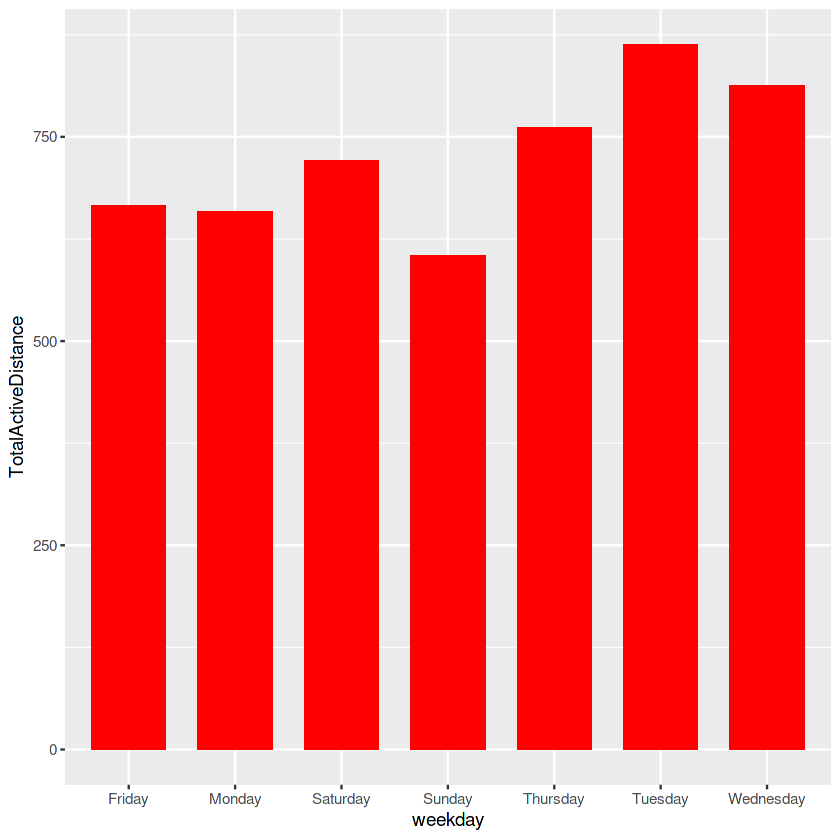

In [27]:
#PLOT5: "Weekday v/s Total active distance"

daily_intensities$weekday<- weekdays(daily_intensities$ActivityDay)

head(daily_intensities, n=4)

ggplot(daily_intensities, aes(x=weekday, y=TotalActiveDistance))+
geom_bar(stat="identity", width=.7, fill="red")


**Analysis:**
From the plot we can observe that Tuesday, Wednesday and Thursday are the days when participants were highly active (i.e. more the active distance, more calories are burned). Statistically people are more relaxed on weekends and the day after that.

In [28]:
#hourly_intensities

hourly_intensities$ActivityHour=as.POSIXct(hourly_intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourly_intensities$time <- format(hourly_intensities$ActivityHour, format = "%H:%M:%S")
hourly_intensities$date <- format(hourly_intensities$ActivityHour, format = "%m/%d/%y")

head(hourly_intensities,4)


,Id,ActivityHour,TotalIntensity,AverageIntensity,time,date
,<dbl>,<dttm>,<int>,<dbl>,<chr>,<chr>
1,1503960366,2016-04-12 00:00:00,20,0.333333,00:00:00,04/12/16
2,1503960366,2016-04-12 01:00:00,8,0.133333,01:00:00,04/12/16
3,1503960366,2016-04-12 02:00:00,7,0.116667,02:00:00,04/12/16
4,1503960366,2016-04-12 03:00:00,0,0.000000,03:00:00,04/12/16


In [29]:
intensity<-hourly_intensities %>% 
group_by(time) %>%
summarise(mean_intensity = mean(TotalIntensity))
head(intensity,4)


time,mean_intensity
<chr>,<dbl>
00:00:00,2.1295503
01:00:00,1.4190782
02:00:00,1.0439443
03:00:00,0.4437299


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


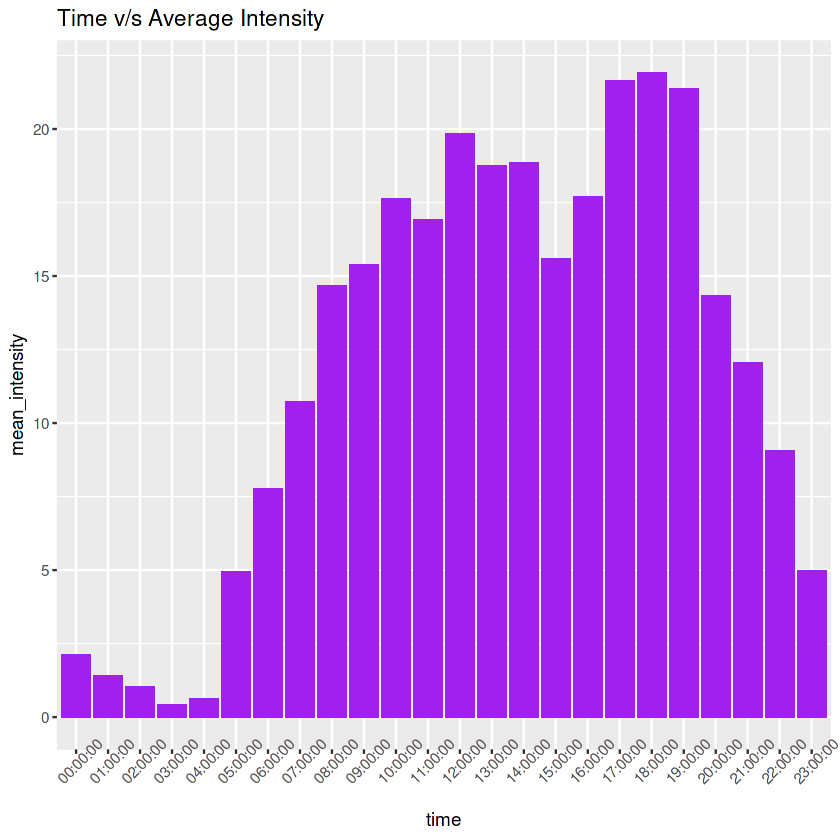

In [30]:
#PLOT6: "Time v/s Average Intensity"
ggplot(data = intensity , aes(x= time, y=mean_intensity)) + geom_histogram(stat="identity",fill = "purple")+
theme(axis.text.x = element_text(angle = 45)) +
labs(title="Time v/s Average Intensity")


**Analysis:**
Above plot shows that people are more active in the evening, around 4pm to 7pm, than compared to morning.

**PHASE 5: SHARE**



PFB the conclusions and recommendations based on the analysis done from data pulled and plots prepared:

* Average steps taken per day is around 7000-8000, which is less according to WHO. Bellabeat app can add a feature notifying how many steps they have covered and encourage them to meet the target for maintaining a healthy lifestyle. 
* As we noticed that there is a linear relation between distance covered and calories burned. From data, we also noticed that participants had a sound sleep when they burned more calories . 
* From analysis, we found out that people are more active in evening time (between 4pm-7pm) and less active in morning. Bellabeat can use this data and add a feature in their app, notifying people to go out or workout in evening time. 
* We noticed that there was a gap between “time in bed” and “time asleep” which needs to be reduced for a healthy lifestyle. Bellabeat can share short videos to users explaining why it is important to not use phones and any electronic item before sleep. And also can notify them it’s “time-to-sleep”. 
* Bellabeat should also track calories consumption apart from tracking activities and water consumption. If a person consumes a healthy meal in a day then he/she feels active throughout the day. 
